<a href="https://colab.research.google.com/github/muneeba-younus/US-Super-Store-EDA-RFM/blob/main/US_SuperStore_EDA_%26_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the important Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Exploring the Dataset

In [2]:
storedata = pd.read_excel("/content/US Superstore data.xlsx")
storedata = storedata.drop(['Row ID'], axis=1)
storedata.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
storedata.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
# Checking for missing values
storedata.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Adding new coumn Profit Margin%
storedata['Profit Margin %'] = (storedata.Profit / storedata.Sales) * 100
storedata.to_csv('US SuperStore.xlsx')
storedata.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin %
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25


# **Exploratory Data Analysis**

1. Which US States are generating more business?

In [6]:
# States vs Sales

top_states= storedata.groupby(['State'])[['Sales', 'Profit']].sum().sort_values(by=['Sales'], ascending=False).reset_index().set_index('State')
top_states

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Texas,170188.0458,-25729.3563
Washington,138641.2700,33402.6517
Pennsylvania,116511.9140,-15559.9603
Florida,89473.7080,-3399.3017
Illinois,80166.1010,-12607.8870
Ohio,78258.1360,-16971.3766
Michigan,76269.6140,24463.1876


In [7]:
fig = px.bar(top_states.head(10), title = "Top 10 States vs Sales & Profit")
fig.show()

2. Which US Cities are generating more business?

In [8]:
top_cities= storedata.groupby(['City'])[['Sales', 'Profit']].sum().sort_values(by=['Sales'], ascending=False).reset_index().set_index('City')
top_cities

,Sales,Profit
City,,
New York City,256368.161,62036.9837
Los Angeles,175851.341,30440.7579
Seattle,119540.742,29156.0967
San Francisco,112669.092,17507.3854
Philadelphia,109077.013,-13837.7674
...,...,...
Ormond Beach,2.808,-1.9656
Pensacola,2.214,-1.4760
Jupiter,2.064,0.1548


In [9]:
fig = px.bar(top_cities.head(20), title = "Top 20 Cities vs Sales & Profit")
fig.show()

3. Which US Region Is Profitable? 

In [10]:
# Region vs Sales

regions_sale = storedata.groupby(['Region'])[['Sales', 'Profit']].sum().sort_values(by=['Sales'], ascending=False).reset_index().set_index('Region')
regions_sale

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


In [11]:
fig = px.bar(regions_sale, title = "Regions vs Sales & Profit")
fig.show()

4. Which Product Category is the Most Profitable?

In [12]:
categories = storedata.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum().sort_values(by=['Sales'], ascending=False).reset_index().set_index('Category')
categories

,Sales,Profit,Quantity
Category,,,
Technology,836154.0330,145454.9481,6939
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906


In [13]:
fig = px.bar(categories, title = "Regions vs Sales & Profit")
fig.show()

5. What is the  Most Profitable Sub-Category?

In [14]:
#Sub-Category vs Sales & Profit

sub_category = storedata.groupby(['Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by=['Sales'], ascending=False).reset_index().set_index('Sub-Category')
sub_category

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [15]:
fig = px.bar(sub_category, title = "Regions vs Sales & Profit")
fig.show()

6. Which Segment is profitable?

In [16]:
segment = storedata.groupby(['Segment'])['Profit'].sum().reset_index()
segment

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


In [17]:
fig = px.pie(segment, values='Profit', names='Segment',title = "Customer Segment vs Sales & Profit")
fig.show()

7. Which shipping method do customers favour most?

In [18]:
ship = storedata.groupby(['Ship Mode'])['Profit'].sum().reset_index()
ship

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


In [19]:
fig = px.pie(ship, values='Profit', names='Ship Mode',title = "Customer Segment vs Sales & Profit")
fig.show()

8. Annual trends in sales and profits

In [20]:
# it was already datetime object before, not a necessary step
storedata['Order Date'] = pd.to_datetime(storedata['Order Date'], errors = 'coerce')

#extracting Year out of the Date to do year-wise analysis
storedata['Year'] = storedata['Order Date'].dt.year

#extracting month out of the Date to do month-wise analysis
storedata['Month'] = storedata['Order Date'].dt.month

#extracting Day out of the Date to do daywise analysis
storedata['Date'] = storedata['Order Date'].dt.day

In [21]:
## The Distribution of Sales in each Year
yearly_sales = storedata.groupby(['Year'])['Sales','Profit'].sum().reset_index()
yearly_sales['Year'] = yearly_sales['Year'].astype(str)
yearly_sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,Sales,Profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


In [22]:
fig = px.line(yearly_sales, x='Year', y='Sales',title='The Distribution of Sales in each year',markers=True)
fig.show()

In [23]:
## The Distribution of Sales in each month

monthly_sales = storedata.groupby(['Month'])['Sales','Profit'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Month,Sales,Profit
0,1,94924.8356,9134.4461
1,2,59751.2514,10294.6107
2,3,205005.4888,28594.6872
3,4,137762.1286,11587.4363
4,5,155028.8117,22411.3078
5,6,152718.6793,21285.7954
6,7,147238.0970,13832.6648
7,8,159044.0630,21776.9384
8,9,307649.9457,36857.4753
9,10,200322.9847,31784.0413


9. Monthly trends in sales and profits

In [24]:
## The Distribution of Sales in each month

fig = px.line(monthly_sales, x='Month', y='Sales',title='The Distribution of Sales in each month',markers=True)
fig.show()

10. TOp 10 customers

In [25]:
top_customers = storedata[['Customer ID','Customer Name']].value_counts().nlargest(20)
top_customers.to_csv('TopCustomers.csv')
top_customers

Customer ID  Customer Name      
WB-21850     William Brown          37
PP-18955     Paul Prost             34
JL-15835     John Lee               34
MA-17560     Matt Abelman           34
SV-20365     Seth Vernon            32
JD-15895     Jonathan Doherty       32
CK-12205     Chloris Kastensmidt    32
EH-13765     Edward Hooks           32
EP-13915     Emily Phan             31
ZC-21910     Zuschuss Carroll       31
AP-10915     Arthur Prichep         31
LC-16870     Lena Cacioppo          30
SH-19975     Sally Hughsby          29
KL-16645     Ken Lonsdale           29
Dp-13240     Dean percer            29
GT-14710     Greg Tran              29
BM-11650     Brian Moss             29
CL-12565     Clay Ludtke            28
CS-12250     Chris Selesnick        28
XP-21865     Xylona Preis           28
dtype: int64

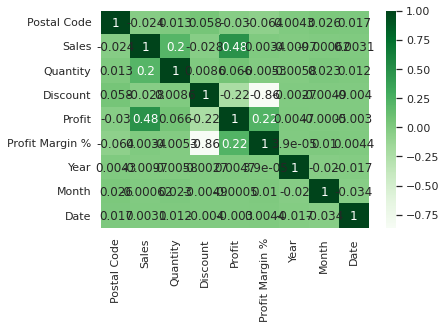

In [26]:
storedata.corr()
sns.heatmap(storedata.corr(),cmap='Greens',annot=True);
plt.rcParams['figure.figsize']=(10,5)

# **RFM Analysis**

In [27]:
# For our recency calculations, we're using our most recent purchase date as the "baseline" date
latest_date = storedata['Order Date'].max()
print(latest_date) 

2017-12-30 00:00:00


In [28]:
# 1.1 - Create RFM scores by aggregating Customer ID and using 3 separate lambda functions to form a new dataframe (RFMdf)
# R is established with the difference between the current date (latest_date) and the customer ID's most recent date of purchase
# F is the number of purchases each customer ID has made, or the count of records each customer ID has in the database
# M is the sum of sales contributed by each customer ID
data_RFM = storedata.groupby(['Customer ID']).agg(
    Recency = ('Order Date', lambda x: (latest_date - x.max()).days), 
    Frequency = ('Order ID', 'count'), 
    Monetary_Value = ('Sales', 'sum') )

<Figure size 864x720 with 0 Axes>

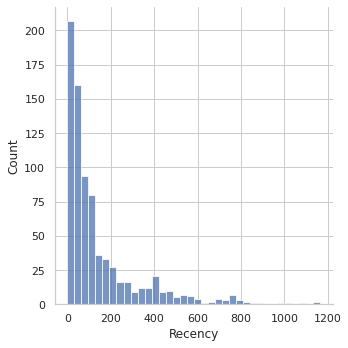

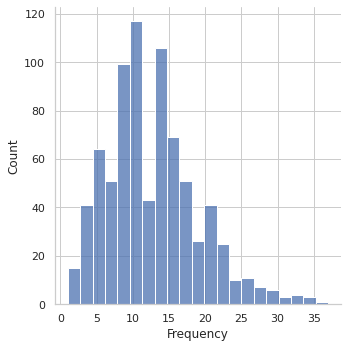

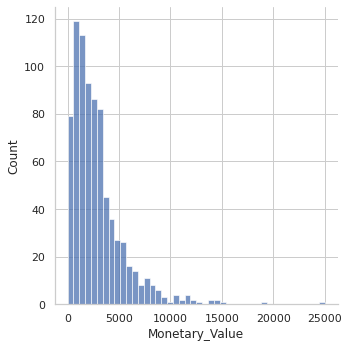

In [29]:
plt.figure(figsize=(12,10))
sns.displot(data_RFM['Recency'])
sns.displot(data_RFM['Frequency'])
sns.displot(data_RFM['Monetary_Value'])

In [30]:
r_labels = range(4,0,-1)
r_groups = pd.qcut(data_RFM['Recency'],q=4, labels = r_labels)

f_labels = range(1,5)
f_groups = pd.qcut(data_RFM['Frequency'],q=4, labels=f_labels)

m_labels = range(1,5)
m_groups = pd.qcut(data_RFM['Monetary_Value'],q=4, labels=m_labels)

In [31]:
data_RFM = data_RFM.assign(R = r_groups.values, F = f_groups.values, M = m_groups)
data_RFM.head()

,Recency,Frequency,Monetary_Value,R,F,M
Customer ID,,,,,,
AA-10315,184,11,5563.560,1,2,4
AA-10375,19,15,1056.390,4,3,1
AA-10480,259,12,1790.512,1,2,2
AA-10645,55,18,5086.935,3,4,4
AB-10015,415,6,886.156,1,1,1


In [32]:
def rfm_concat(x):
  return str(x['R'])+str(x['F'])+ str(x['M'])

data_RFM['RFM_Group'] = data_RFM.apply(rfm_concat, axis=1)
data_RFM

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Group
Customer ID,,,,,,,
AA-10315,184,11,5563.560,1,2,4,1.02.04.0
AA-10375,19,15,1056.390,4,3,1,4.03.01.0
AA-10480,259,12,1790.512,1,2,2,1.02.02.0
AA-10645,55,18,5086.935,3,4,4,3.04.04.0
AB-10015,415,6,886.156,1,1,1,1.01.01.0
...,...,...,...,...,...,...,...
XP-21865,43,28,2374.658,3,4,3,3.04.03.0
YC-21895,4,8,5454.350,4,1,4,4.01.04.0
YS-21880,9,12,6720.444,4,2,4,4.02.04.0


In [33]:
Loyalty = []
def loyalty_groups(r):
        if (r['R'] == 4 and r['F'] == 4 and r['M'] == 4):
            return 'Golden' # Has all 4s
        elif (r['R'] >=3 and r['F'] >= 3 and r['M'] >= 3): 
            return 'Silver' # Has at least 3 in each category
        elif (r['R'] >= 2 and r['F'] >= 2 and r['M'] >= 2) or \
             (r['R'] >= 1 and r['F'] == 4 and r['M'] >= 1):
            return 'Bronze' # Loyal customers have moderate F/M scores, represent a dependable majority
        elif (r['R'] >= 1 and r['F'] >= 2 and r['M'] == 2) or \
             (r['R'] >= 1 and r['F'] >= 2 and r['M'] == 3):
            return 'Churn Risk' # Moderate M with low R/F
        elif (r['R'] <= 2 and r['F'] >= 1 and r['M'] >= 3):
            return 'High-Spend' # High M and Low R/F, likely purchased with a discount/promotion
        elif (r['R'] >= 3 and r['F'] >= 1 and r['M'] >= 1):
            return 'New' # High R, new customers
        else: 
            return 'Churning' # Customers with the lowest R/F values
data_RFM['Loyalty'] = data_RFM.apply(loyalty_groups, axis = 1)

Platinum | All scores = 4 | 444 | Highest-scoring, most loyal customers | | Gold | All scores >= 3 | 333, 344 | At least 3 in all categories; captures customers who are second-most loyal | | Silver | Moderate/high scores | 133, 324 | Casts a wide net to capture customers who aren't quite gold, but are very loyal | | Churn Risk | Moderate M/F; Low R | 122, 133 | No recent purchases; at risk of defecting to competitors | | High-Spend | High M; Low R/F | 113, 214 | Top 25% of sales; Large purchases but very infrequent | | New | High R; Low M | 411, 431 | Made their first purchase recently, or their first purchase in a long time | | Churning | Lowest scores | 111, 112 | Lowest loyalty group; likely receptive to competitor-focused targeting |

In [34]:
gold_cust = data_RFM['Loyalty'] == 'Silver Customers'
silv_cust = data_RFM['Loyalty'] == 'Bronze Customers'
churn_cust = data_RFM['Loyalty'] == 'Churning Customers'
new_cust = data_RFM['Loyalty'] == 'New Customers'
churnRisk_cust = data_RFM['Loyalty'] == 'Churn Risk Customers'
highSpend_cust = data_RFM['Loyalty'] == 'High-Spend Customers'
plat_cust = data_RFM['Loyalty'] == 'Golden Customers'

LoyaltyCount = data_RFM.Loyalty.value_counts()
LoyaltyCount

Bronze        262
Churning      160
Silver        149
New           107
Churn Risk     53
High-Spend     33
Golden         29
Name: Loyalty, dtype: int64